In [1]:
%matplotlib inline   
import matplotlib.pyplot as plt
import numpy as np
from astropy.convolution import convolve, Gaussian1DKernel

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.5)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelcolor'] = "#000000"

In [2]:
image_length = 2000
input_image = np.random.randn(image_length)
plot_length = 20

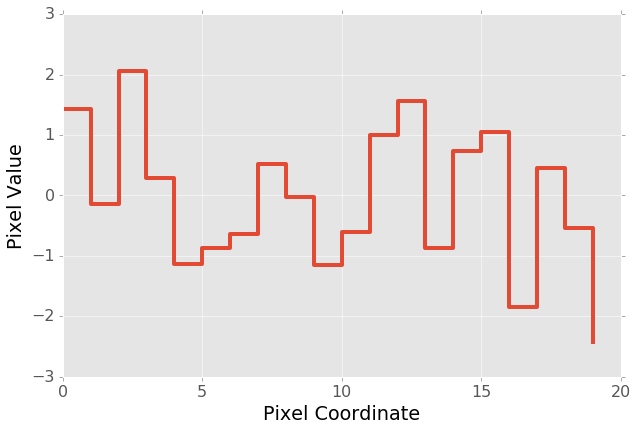

In [3]:
plt.plot(input_image[:plot_length], drawstyle='steps-post', lw=4)
plt.ylabel("Pixel Value")
plt.xlabel("Pixel Coordinate")

PSF Matching Convolution
========================

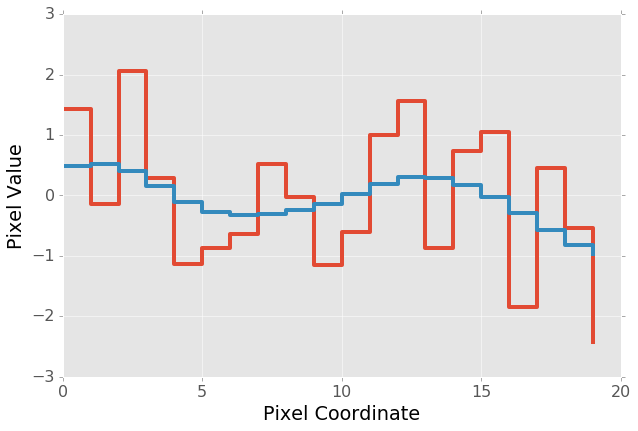

In [4]:
convolved_image = convolve(input_image, Gaussian1DKernel(stddev=2))
plt.plot(input_image[:plot_length], drawstyle='steps-post', lw=4)
plt.plot(convolved_image[:plot_length], drawstyle='steps-post', lw=4)
plt.ylabel("Pixel Value")
plt.xlabel("Pixel Coordinate")

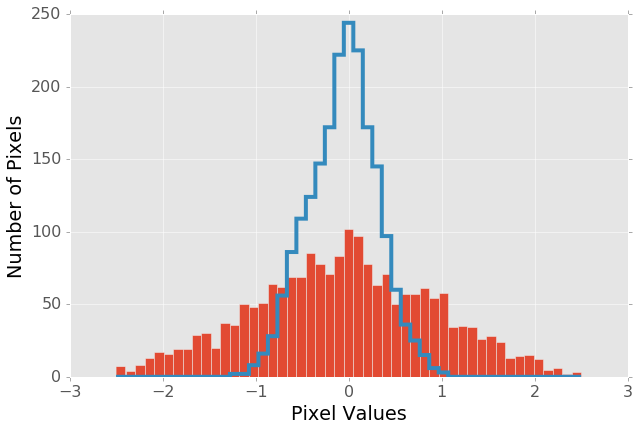

In [5]:
bins = np.linspace(-2.5,2.5,50)
#H_input, _ = np.histogram(input_image, bins=bins)
#H_convolved, _ = np.histogram(convolved_image, bins=bins)
plt.hist(input_image, bins=bins)
_ = plt.hist(convolved_image, bins=bins, histtype="step", lw=4)
plt.xlabel("Pixel Values")
plt.ylabel("Number of Pixels")

In [6]:
convolved_stddev = np.std(convolved_image)
print "Convolved σ: {:.2f}".format(convolved_stddev) 

Convolved σ: 0.37


Detection Convolution
=====================

121 detections


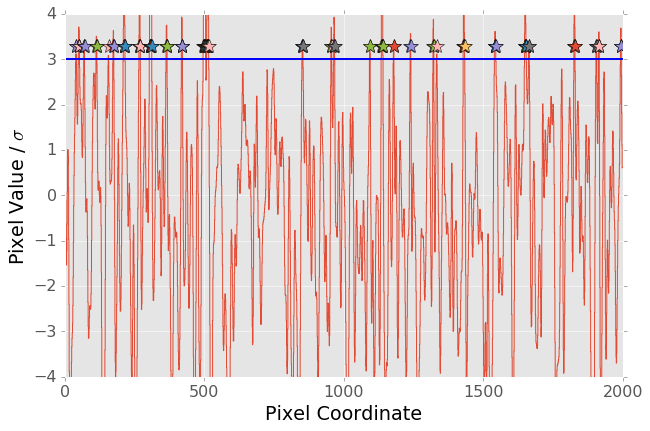

In [7]:
sigma_correction = 1/(2*np.sqrt(2))
detection_image = convolve(convolved_image,
                           Gaussian1DKernel(stddev=2)) / convolved_stddev / sigma_correction
plt.plot(detection_image, drawstyle='steps-pre')
plt.axhline(3, lw=2)
detections = np.argwhere(detection_image > 3)
for n in detections:
    plt.plot(n, 3.3, '*', ms=15)
plt.ylabel("Pixel Value / $\sigma$")
plt.xlabel("Pixel Coordinate")
plt.ylim(-4,4)
print "{:d} detections".format(len(detections))

Shuffle convolved image, then re-detect
----------

1 detections


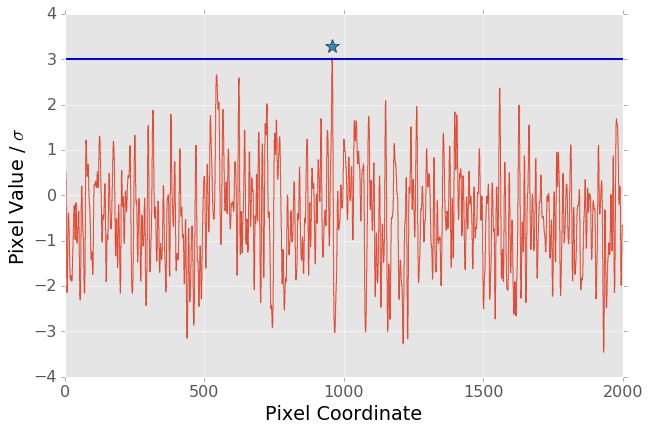

In [8]:
shuffled_image = convolved_image.copy()
np.random.shuffle(shuffled_image)

sigma_correction = 1/(2*np.sqrt(2))
detection_image = convolve(shuffled_image,
                           Gaussian1DKernel(stddev=2)) / convolved_stddev / sigma_correction
plt.plot(detection_image, drawstyle='steps-pre')
plt.axhline(3, lw=2)
detections = np.argwhere(detection_image > 3)
for n in detections:
    plt.plot(n, 3.3, '*', ms=15)
plt.ylabel("Pixel Value / $\sigma$")
plt.xlabel("Pixel Coordinate")
plt.ylim(-4,4)
print "{:d} detections".format(len(detections))

Covariance Matrix
=================

In [9]:
def compute_covariance(pieces):
    mean_x = np.mean(np.vstack(pieces), axis=0)
    S = np.sum([np.matrix(piece - mean_x).T * np.matrix(piece - mean_x)
                for piece in pieces], axis=0)/float(len(pieces))
    return S

image_pieces = [np.random.randn(10) for n in range(100)]
convolved_pieces = [convolve(piece, Gaussian1DKernel(stddev=2)) for piece in image_pieces]

S_original = compute_covariance(image_pieces)
S_convolved = compute_covariance(convolved_pieces)

np.set_printoptions(precision=2, suppress=True)
print S_convolved

[[ 0.09  0.11  0.11  0.09  0.07  0.05  0.03  0.02  0.01 -0.  ]
 [ 0.11  0.13  0.14  0.12  0.1   0.07  0.05  0.03  0.01 -0.  ]
 [ 0.11  0.14  0.15  0.15  0.13  0.1   0.07  0.04  0.01 -0.  ]
 [ 0.09  0.12  0.15  0.16  0.15  0.13  0.09  0.05  0.02  0.  ]
 [ 0.07  0.1   0.13  0.15  0.15  0.14  0.11  0.07  0.04  0.01]
 [ 0.05  0.07  0.1   0.13  0.14  0.14  0.12  0.09  0.06  0.03]
 [ 0.03  0.05  0.07  0.09  0.11  0.12  0.12  0.11  0.08  0.06]
 [ 0.02  0.03  0.04  0.05  0.07  0.09  0.11  0.11  0.1   0.08]
 [ 0.01  0.01  0.01  0.02  0.04  0.06  0.08  0.1   0.1   0.09]
 [-0.   -0.   -0.    0.    0.01  0.03  0.06  0.08  0.09  0.08]]


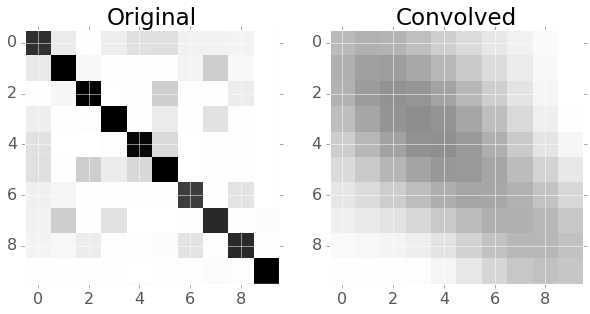

In [10]:
plt.subplot(1,2,1)
plt.imshow(S_original, interpolation="none", vmin=0, vmax=1, cmap='gray_r')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(S_convolved/sigma_correction, interpolation="none", vmin=0, vmax=1, cmap='gray_r')
plt.title("Convolved")
#plt.colorbar()